Group: I-Need-More-Boolets

Members: <br>
Go, Ryan Jefferson <br>
Ejercito, Joshua Carl <br>
Moraña, Anton Louis <br>
Nieva, Samuel 

Section: S11

# Introduction to the problem/task and dataset

This major course output tasked our group to select a real-word dataset from the selection given. This group has selected the stars dataset, which is a dataset containing spectral characteristics derived from pictures taken by the SDSS (Sloan Digital Sky Survey). This dataset's main use is spectral classification, i.e., classifying whether a celestial body is a star, a quasar or an entire galaxy.

Using the dataset, the group is to perform the following:
- Describe the dataset
- Perform Data Pre-processing and Cleaning
- Perform Exploratory Data Analysis
- Select 3 Machine Learning Models
- Perform model training
- Perform hyperparameter tuning
- Extract insights from the data

# Description of the dataset

As stated earlier, the Stars datasets contains spectral characteristics from celestial bodies that can be used to classify it as either a quasar, star, or galaxy. This dataset is made up of 100,000 obersavations of space taken by the SDSS (Sloan Digital Sky Survey) with each observations having 18 features. The SDSS takes these observations through the use of a 2.5m wide located at Apache Point Observatory in New Mexico. The telescope is described in detail in a paper by Gunn et al. (2006), and it is through this powerful telescope that a robust astronomical survey is created, from which datasets such as this are derived.

The following are the description of their features:
1. obj_ID =  the unique value that identifies the object in the image catalog used by th CAS (Chinese Academy of Sciences).
2. alpha = it contains the right ascension angle, it is measured from the start of a point which is called vernal equinox and go eastward. It is expressed in hours, minutes, and seconds. Vernal equinox is when the sun is exactly above the equator and day and night are of equal day. It is similar to the longitude in space.
3. delta = it contains the declination angle, which shows the angle between the celestial equator and a point on the celestial sphere. It is like the latitude in space which results can either be positive or negative. Positive means that the object is located north while negative means it is located south.
4. u – Ultraviolet filter in the photometric system.
5. g – Green filter in the photometric system.
6. r – Red filter in the photometric system.
7. i – Near Infrared filter in the photometric system.
8. z – Infrared filter in the photometric system.
9. run_ID – Run Number used to identify the specific scan.
10. rereun_ID – Rerun Number to specify how the image was processed.
11. cam_col – Camera column to identify the scanline within the run.
12. field_ID – Field number to identify each field.
13. spec_obj_ID – Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class).
14. class – object class (galaxy, star or quasar object). This is the label the group will be tasking the models to predict.
15. redshift – redshift value based on the increase in wavelength.
16. plate – plate ID, identifies each plate in SDSS (Sloan Digital Sky Survey).
17. MJD – Modified Julian Date, used to indicate when a given piece of SDSS (Sloan Digital Sky Survey) data was taken.
18. fiber_ID – identifies the fiber that pointed the light at the focal plane in each observation.

The first few rows of the dataset look like this:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

seed_num = 12

np.random.seed(seed_num)

stars = pd.read_csv('stars.csv')
print("stars dataset shape: ", stars.shape)
stars.head()

stars dataset shape:  (100000, 18)


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


The following shows the number of data points for each class.

In [2]:
stars['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

The following shows the datatypes of each feature within the dataset:

In [3]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

# List of requirements

The group will be using Python's scikit learn library for their classification models (I think), scipy, scikit, numpy and pandas array for processing data, and matplotlib for visualizing data (add stuff if need pa)

# Data Cleaning and Preprocessing

To begin, we assign a set of columns that will be the focus for data cleaning and preprocessing, namely the `u`, `g`, `r`, `i`, `z`, and `redshift` columns.

In [4]:
columns_to_clean = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

## Replacement of `obj_ID` column

The `obj_ID` column assigns a unique ID for each observation in the dataset, although it is represented in a floating point format. For the purposes of the study, this will be replaced with a similarly-named column that utilizes integer IDs instead in order to simplify the access to each element.

In [5]:
stars = stars.drop(['obj_ID'], axis=1)
stars['obj_ID'] = np.arange(len(stars))
stars.insert(0, 'obj_ID', stars.pop('obj_ID'))
stars

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Checking for empty observations

Checking was done for any entries with missing/null features by instantiating another stars dataset whose entries are filtered off of null features.

In [6]:
nan_variables = stars[stars.isnull().any(axis=1)].index
stars_nonull = stars.drop(labels=nan_variables).reset_index(drop=True)
print("stars dataset shape (no null): ", stars_nonull.shape)

stars dataset shape (no null):  (100000, 18)


As shown by the resulting filtered dataset and comparing its shape to the original dataset, it was shown that all entries have all their features accounted for.

## Checking for duplicate entries

Any duplicated entries was checked first by comparing all entries' columns to each other

In [7]:
stars.duplicated().any()

False

As shown, there are no duplicated entries within the dataset.

## Checking for outliers

The removal of outliers aims to craft a dataset whose subset can be used for training data that is generally representative of each classes. We will first check for the existence of outliers in this instance, and any extreme outliers will be removed from analysis.

In [8]:
stars[(np.abs(stats.zscore(stars[columns_to_clean])) < 3).all(axis=1)].shape

(97884, 18)

There are 2116 data points that are considered as outliers based from the z-score metric (>= 3 standard deviations from the mean). In order to know more about these outliers, the features are drawn in a boxplot, displaying their minimum and maximum values respectively.

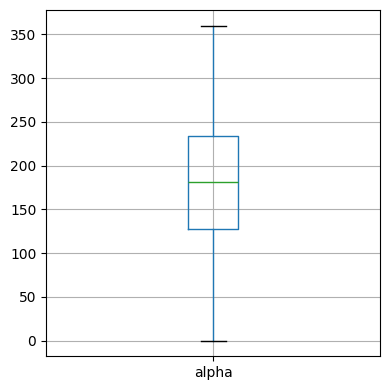

" alpha " minimum value:  0.0055278279239701
" alpha " maximum value:  359.999809770956


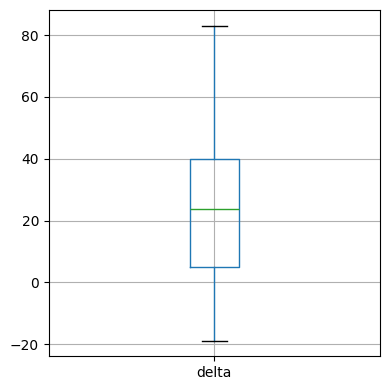

" delta " minimum value:  -18.7853280771825
" delta " maximum value:  83.00051858898


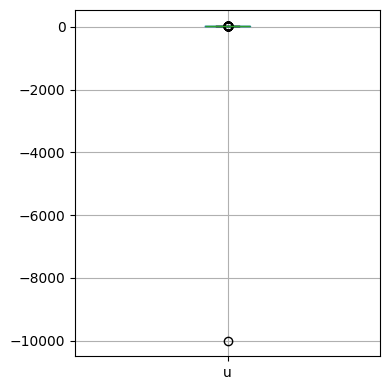

" u " minimum value:  -9999.0
" u " maximum value:  32.78139


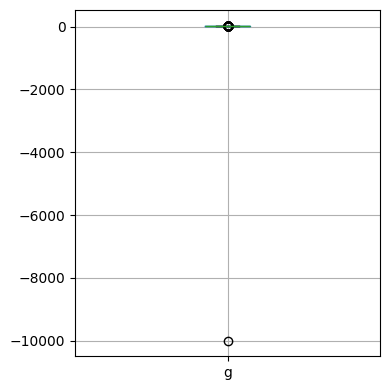

" g " minimum value:  -9999.0
" g " maximum value:  31.60224


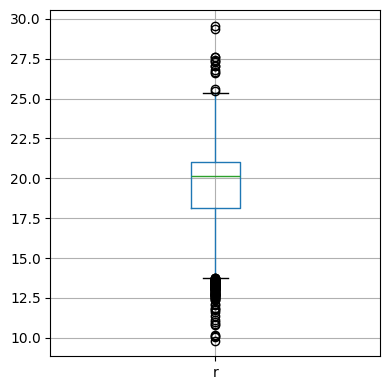

" r " minimum value:  9.82207
" r " maximum value:  29.57186


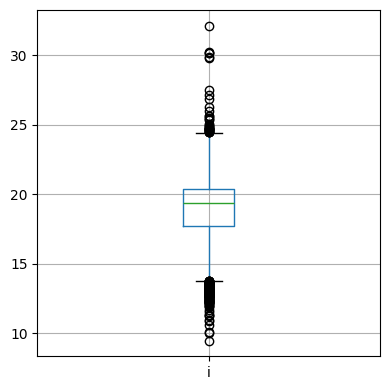

" i " minimum value:  9.469903
" i " maximum value:  32.14147


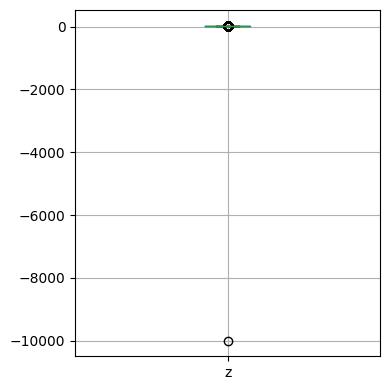

" z " minimum value:  -9999.0
" z " maximum value:  29.38374


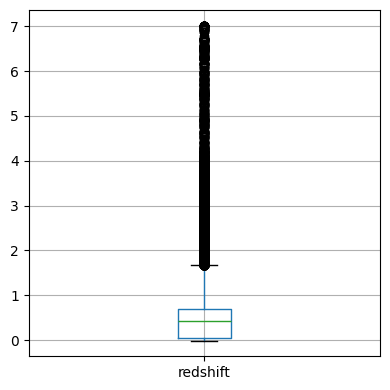

" redshift " minimum value:  -0.009970667
" redshift " maximum value:  7.011245


In [9]:
for col in columns_to_clean:
    stars.boxplot(col, figsize=(4, 4))
    plt.tight_layout()
    plt.show()
    print("\"",col,"\" minimum value: ", stars[col].min())
    print("\"",col,"\" maximum value: ", stars[col].max())

Some features have values equated to a whole value of -9999. This may indicate that these features were not recorded/not available for that observation, thus putting a default value for those features. To resolve this, we will remove the associated entries that has defaule values for these certain features.

In [10]:
default_value = stars['u'].min()
stars = stars[stars['u'] != default_value]
stars = stars[stars['g'] != default_value]
stars = stars[stars['z'] != default_value]
stars.shape

(99999, 18)

Based from the filtered dataset, there is only one entry that contains such default values. Any other outliers will be resolved by applying the robust scaling method for normalization.

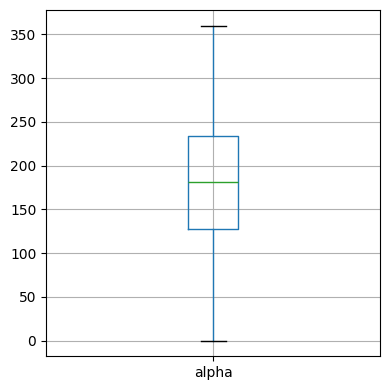

" alpha " minimum value:  0.0055278279239701
" alpha " maximum value:  359.999809770956


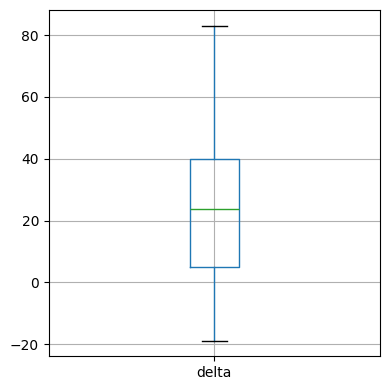

" delta " minimum value:  -18.7853280771825
" delta " maximum value:  83.00051858898


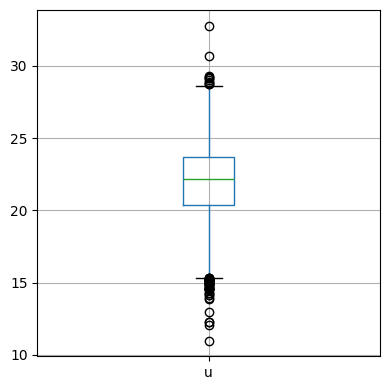

" u " minimum value:  10.99623
" u " maximum value:  32.78139


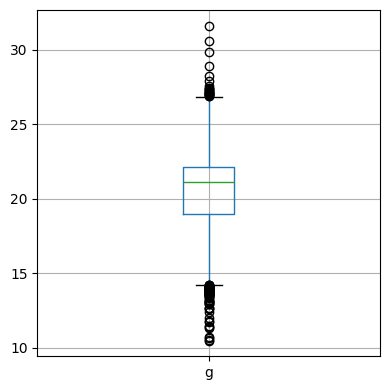

" g " minimum value:  10.4982
" g " maximum value:  31.60224


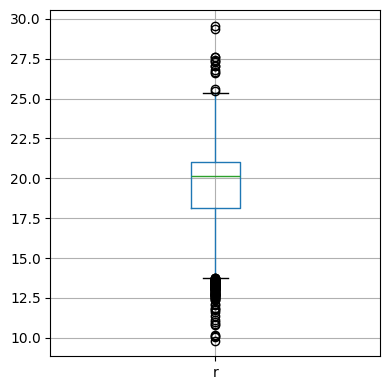

" r " minimum value:  9.82207
" r " maximum value:  29.57186


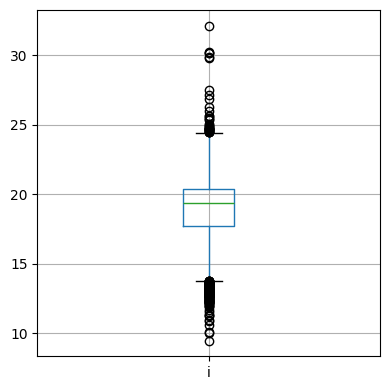

" i " minimum value:  9.469903
" i " maximum value:  32.14147


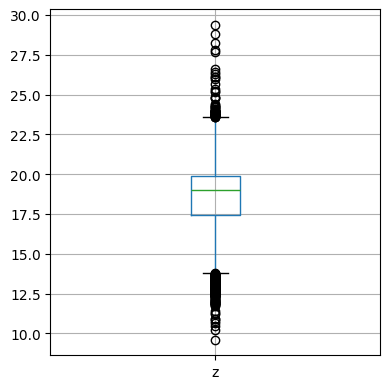

" z " minimum value:  9.612333
" z " maximum value:  29.38374


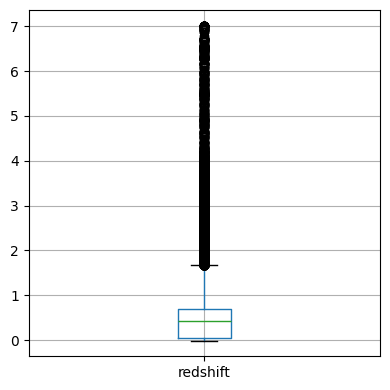

" redshift " minimum value:  -0.009970667
" redshift " maximum value:  7.011245


In [11]:
for col in columns_to_clean:
    stars.boxplot(col, figsize=(4, 4))
    plt.tight_layout()
    plt.show()
    print("\"",col,"\" minimum value: ", stars[col].min())
    print("\"",col,"\" maximum value: ", stars[col].max())

The boxplots indicates that any extreme outliers that comes from the default values were successfully removed.

## Fixing the obj_ID after removal of outliers

Since the outliers were removed, the row obj_ID may not reflect it's actual position in the dataset. To fix this, we simply reassign the obj_IDs incrementally.

In [12]:
stars = stars.drop(['obj_ID'], axis=1)
stars['obj_ID'] = np.arange(len(stars))
stars.insert(0, 'obj_ID', stars.pop('obj_ID'))
stars

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99994,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,99995,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,99996,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,99997,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Normalization

Normalization is performed for the previously-specified columns in order to equally weight-in each of the features for the model training and evaluation. The robust scaler will be applied as normalization technique to account for the massive outliers for some features such as `alpha`, `delta`, `u`, `g,` and `z`.

In order to begin the normalization process, the original dataset is split into training and test dataset.

In [13]:
#Save for EDA
og_stars = stars.copy()

stars_train = stars.sample(frac=0.7,random_state=seed_num)
stars_test = stars.drop(stars_train.index)

In [14]:
print(stars_train.shape)
print(stars_test.shape)

(69999, 18)
(30000, 18)


In [15]:
scaler = RobustScaler().fit(stars_train[columns_to_clean])
stars_train[columns_to_clean] = scaler.transform(stars_train[columns_to_clean])
stars_train.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
76074,76074,1.600838,-0.653444,0.201696,0.162024,-0.023905,-0.245544,-0.378337,4188,301,5,49,1.232976e+18,STAR,-0.651146,1095,52521,420
59701,59701,-0.064724,-0.726566,0.034128,0.344053,0.360867,0.334026,0.458230,1140,301,5,140,4.266309e+18,GALAXY,0.269980,3789,55269,999
73664,73664,-1.528443,-0.960207,-0.911844,-1.141082,-1.132471,-1.071363,-1.058618,1740,301,3,142,3.224632e+18,STAR,-0.651942,2864,54467,197
7228,7228,-0.191236,-0.123871,-0.711827,-1.017740,-1.127491,-1.145352,-1.239132,5313,301,6,12,2.791195e+18,GALAXY,-0.453333,2479,54174,324
34292,34292,1.533221,-0.586932,-0.203909,0.160651,0.553611,0.640247,0.931627,7712,301,5,221,1.273059e+19,QSO,2.189334,11307,58430,152


In [16]:
scaler = RobustScaler().fit(stars_test[columns_to_clean])
stars_test[columns_to_clean] = scaler.transform(stars_test[columns_to_clean])
stars_test.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
1,1,-0.342674,0.218320,0.781088,0.547752,0.847730,0.659242,1.057130,4518,301,5,119,1.176014e+19,GALAXY,0.542278,10445,58158,427
4,4,1.541169,-0.074511,-0.819874,-1.109232,-1.255119,-1.287096,-1.406721,8102,301,3,137,6.891865e+18,GALAXY,-0.477430,6121,56187,842
10,10,1.379617,-0.160517,1.079084,0.449480,0.175589,0.139040,0.019324,8102,301,3,27,5.652162e+18,GALAXY,0.050829,5020,55852,525
13,13,1.411663,-0.398040,-0.402511,-0.739875,-0.904915,-0.897455,-0.967055,7773,301,2,123,5.702738e+18,GALAXY,-0.421953,5065,55739,200
17,17,-1.689672,-0.593760,-0.535548,-0.217933,0.058517,0.243451,0.357378,7712,301,5,339,9.843824e+18,QSO,2.468444,8743,57663,295


## Selecting the relevant features

To train the models, the group has selected the following features (subject to change): `u`, `g`, `r`, `i`, `z` and `redshift`. So, these features must be isolated, along with the `obj_ID` which we will use as the index, and the `class` column which we will use as the labels. The classes will also be transformed to numerical representations of the data:

Galaxy: 0 | Star: 1 | QSO: 2

Our resulting dataset looks like this:

In [17]:
columns_to_use = ['obj_ID', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']
columns_data = ['u','g','r','i','z','redshift']

labels = {'GALAXY':0,'STAR':1,'QSO':2}

stars_df = stars[columns_to_use]
stars_df['class'] = stars_df['class'].map(labels)

stars_df.set_index('obj_ID')

C:\Users\HTMI\AppData\Local\Temp\ipykernel_17836\3313585080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars_df['class'] = stars_df['class'].map(labels)


,u,g,r,i,z,redshift,class
obj_ID,,,,,,,
0,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,0
1,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,0
2,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,0
3,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,0
4,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,0
...,...,...,...,...,...,...,...
99994,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000,0
99995,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895,0
99996,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366,0


# Exploratory Data Analysis

## Central Tendencies

To gain a better understanding of the data, we can begin with examining the central tendencies of the data. These would be the mean, median and mode.

### Means

For the means, we can take the means of each feature, pertaining to each class and compare them to one another. Putting the means together in a table, it would look like this:

In [18]:
means_df = og_stars.groupby('class').mean()
means_df = means_df[['alpha','delta','u','g','r','i','z','redshift']].T

normalized_means_df = stars.groupby('class').mean()
normalized_means_df = normalized_means_df[['alpha','delta','u','g','r','i','z','redshift']].T

print(means_df)

print("\n")

print(normalized_means_df)

class         GALAXY         QSO        STAR
alpha     177.954727  180.474314  174.232180
delta      23.513911   26.808621   23.499671
u          22.587379   21.547619   21.153830
g          20.906101   20.926193   19.617142
r          19.587552   20.624089   18.947005
i          18.851990   20.431173   18.543760
z          18.449156   20.266732   18.334295
redshift    0.421596    1.719676   -0.000115


class         GALAXY         QSO        STAR
alpha     177.954727  180.474314  174.232180
delta      23.513911   26.808621   23.499671
u          22.587379   21.547619   21.153830
g          20.906101   20.926193   19.617142
r          19.587552   20.624089   18.947005
i          18.851990   20.431173   18.543760
z          18.449156   20.266732   18.334295
redshift    0.421596    1.719676   -0.000115


We can then graph it to a bar plot to make it easier to compare to one another. It would look like this:

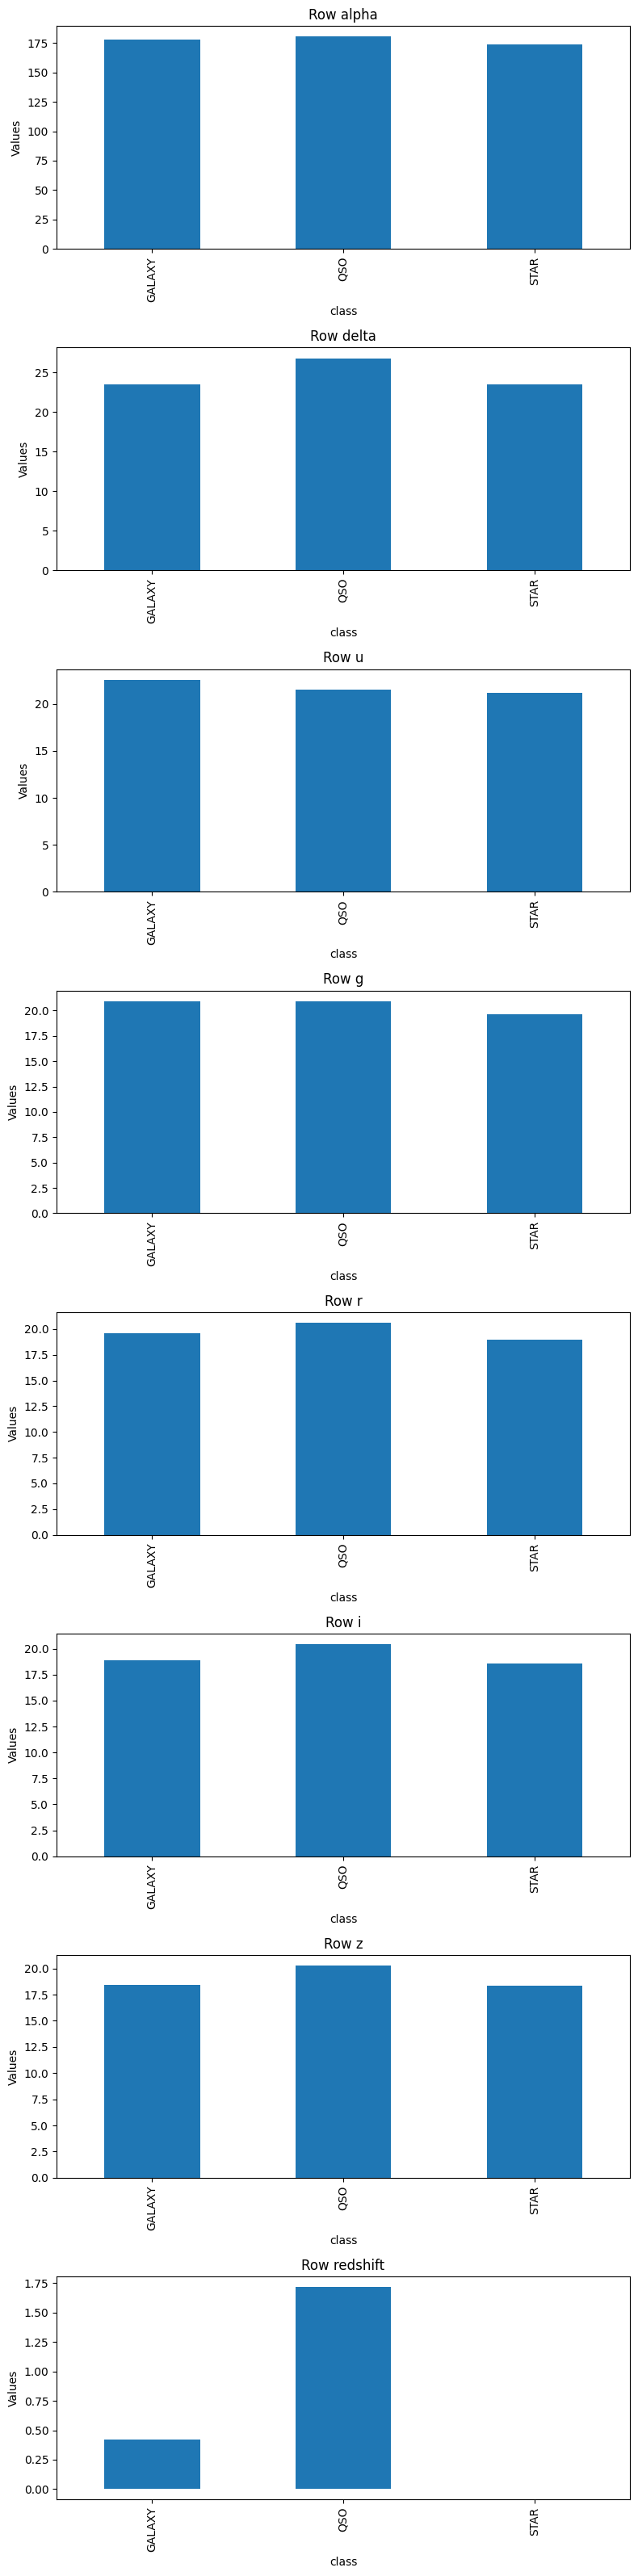

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(means_df), figsize=(8, 4 * len(means_df)))

# Iterate through each row and plot a bar graph
for i, (index, row) in enumerate(means_df.iterrows()):
    # Create a bar plot for each row
    ax = axes[i]
    row.plot(kind='bar', ax=ax, title=f'Row {index}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Analysis goes here, will add later


In [20]:
mode_df = og_stars.groupby('class').apply(lambda x: x.mode().iloc[0])
mode_df = mode_df[['u','g','r','i','z','redshift']].T

normalized_mode_df = stars.groupby('class').apply(lambda x: x.mode().iloc[0])
normalized_mode_df = normalized_mode_df[['u','g','r','i','z','redshift']].T

print(mode_df.head())
print("\n")
print(normalized_mode_df.head())

class    GALAXY       QSO      STAR
0                                  
u      24.63466  24.63466  24.63465
g      22.41741  20.03421  25.11437
r      20.72245  19.61753  24.80203
i      17.35948  19.99037  24.36180
z      22.82690  22.82690  22.82690


class    GALAXY       QSO      STAR
0                                  
u      24.63466  24.63466  24.63465
g      22.41741  20.03421  25.11437
r      20.72245  19.61753  24.80203
i      17.35948  19.99037  24.36180
z      22.82690  22.82690  22.82690


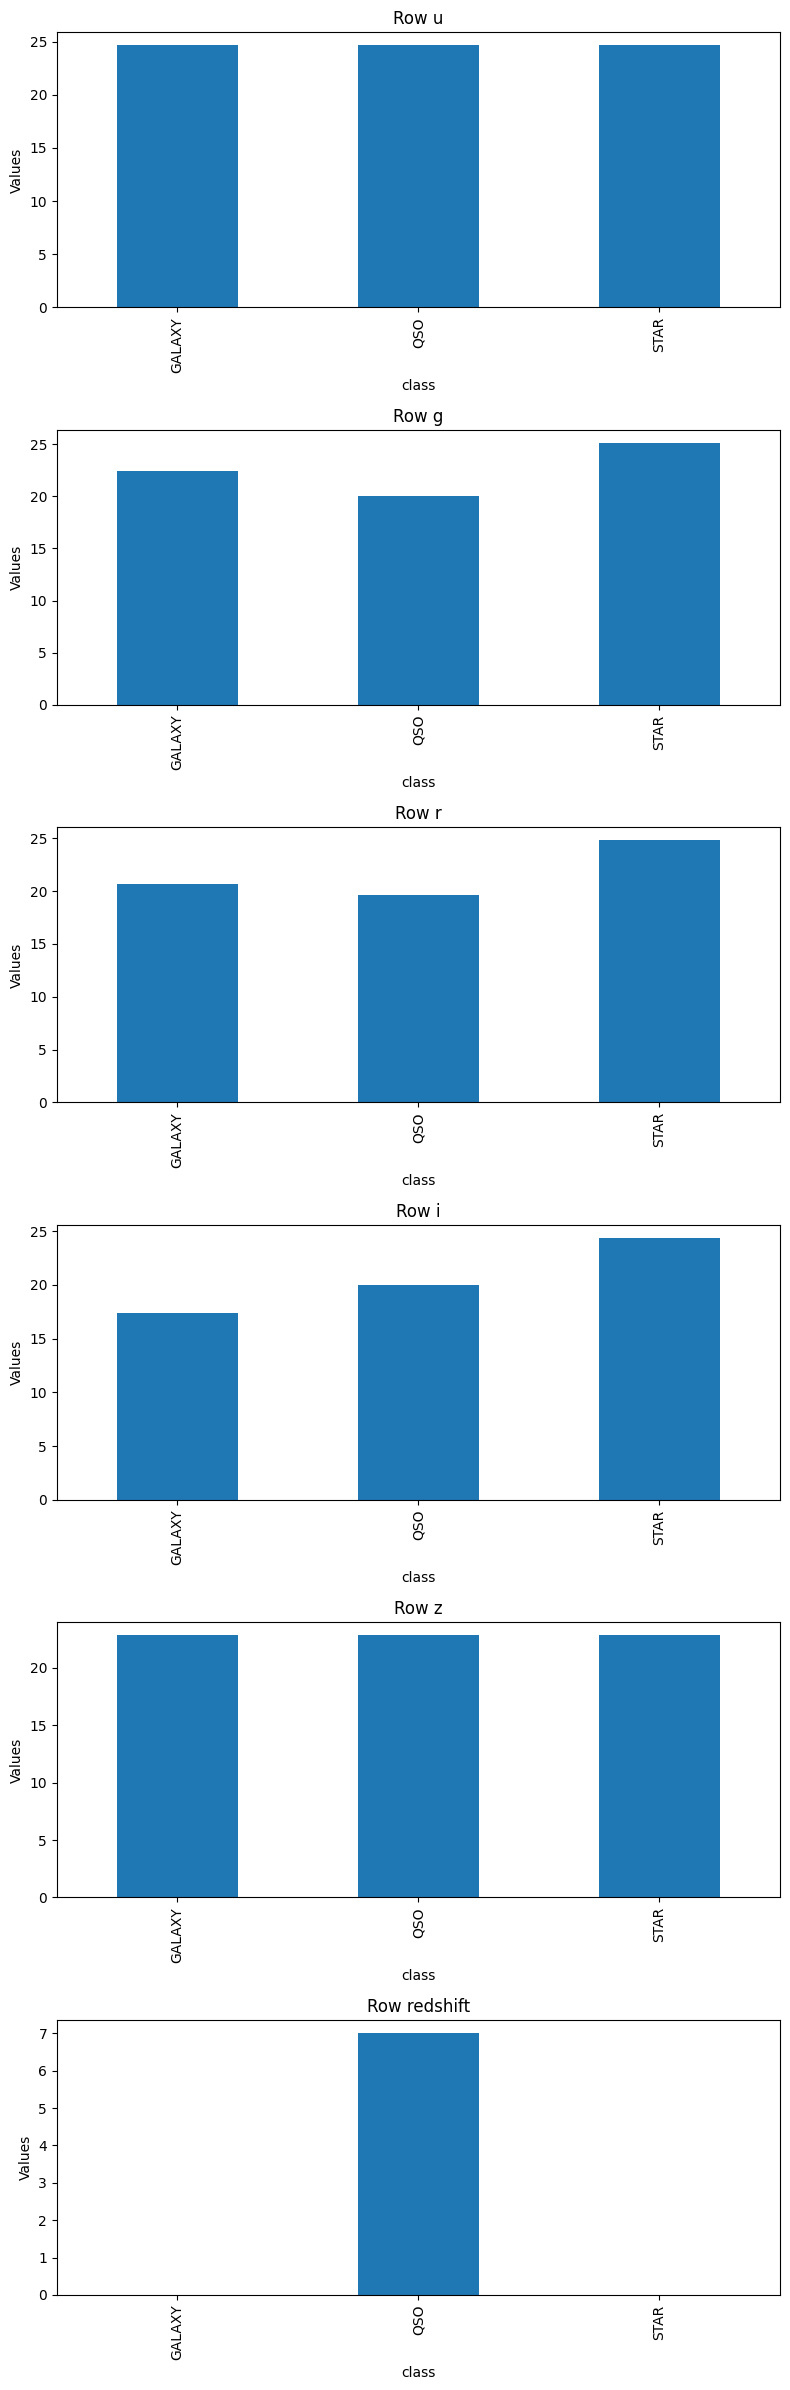

In [21]:
fig, axes = plt.subplots(nrows=len(mode_df), figsize=(8, 4 * len(mode_df)))

# Iterate through each row and plot a bar graph
for i, (index, row) in enumerate(mode_df.iterrows()):
    # Create a bar plot for each row
    ax = axes[i]
    row.plot(kind='bar', ax=ax, title=f'Row {index}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

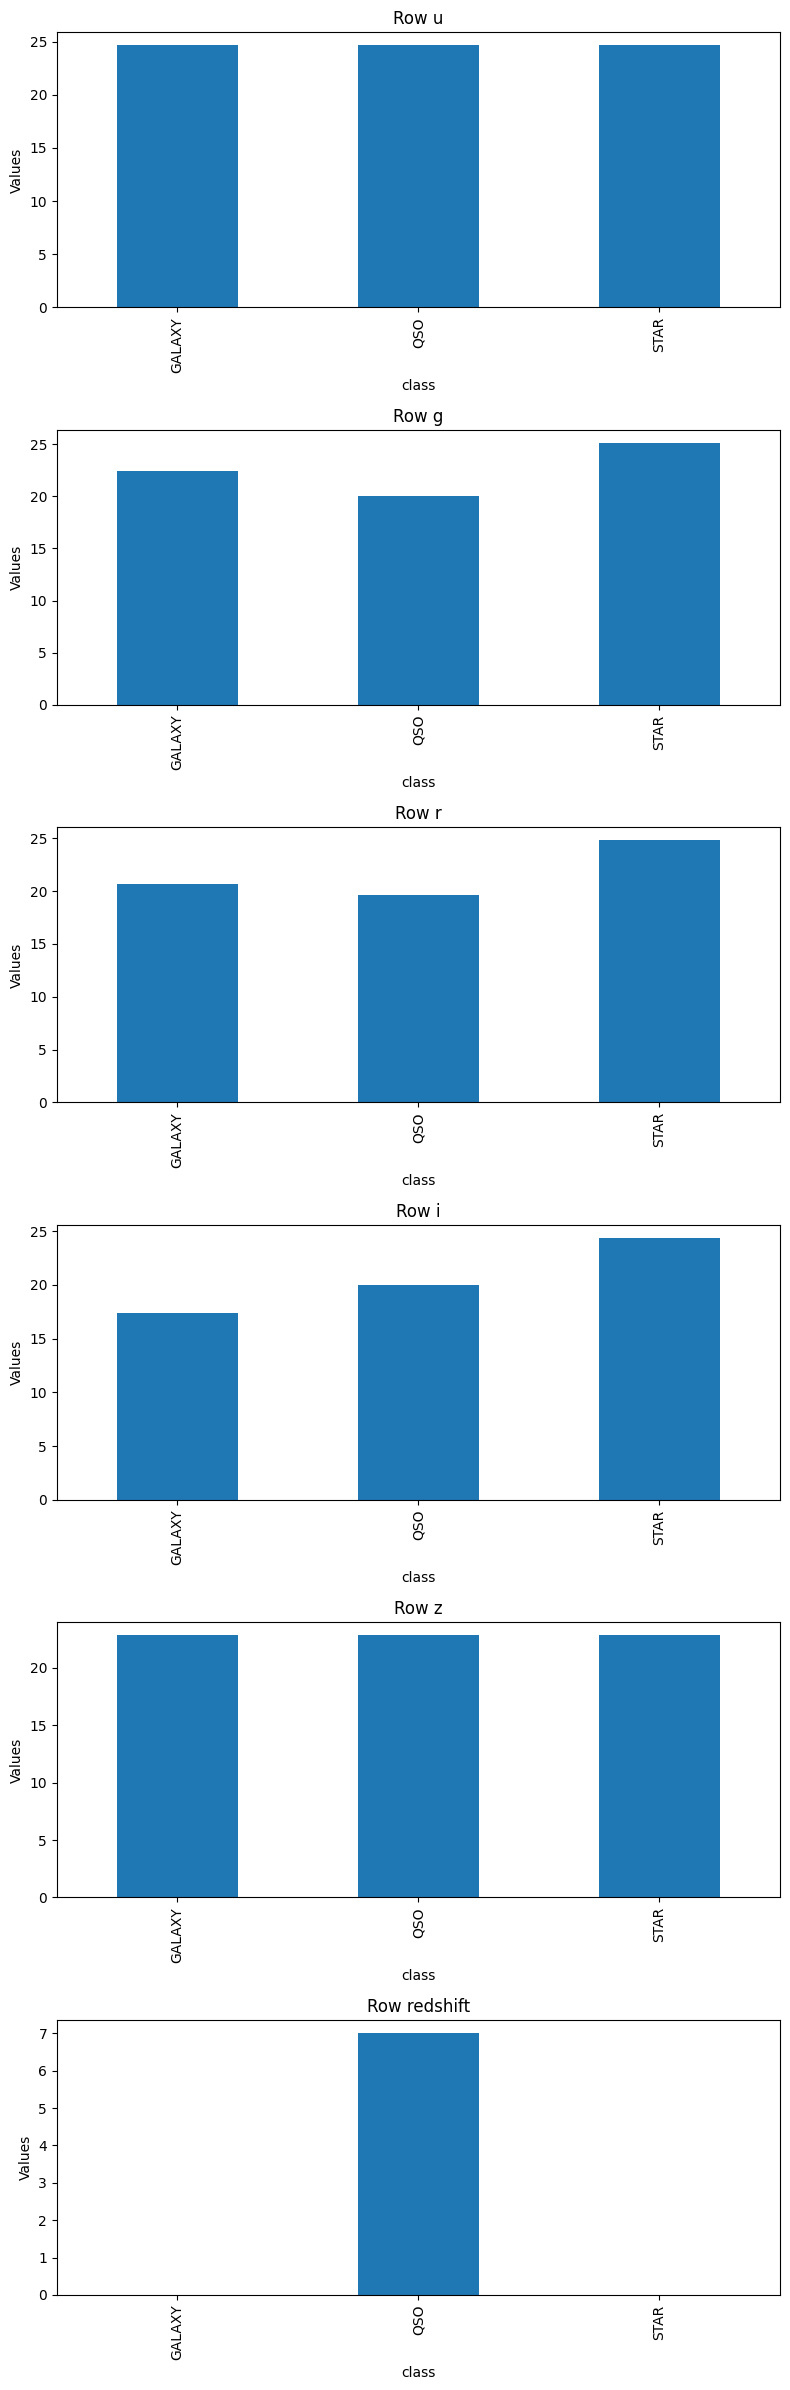

In [22]:
fig, axes = plt.subplots(nrows=len(normalized_mode_df), figsize=(8, 4 * len(normalized_mode_df)))

# Iterate through each row and plot a bar graph
for i, (index, row) in enumerate(normalized_mode_df.iterrows()):
    # Create a bar plot for each row
    ax = axes[i]
    row.plot(kind='bar', ax=ax, title=f'Row {index}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [23]:
median_df = og_stars.groupby('class').median()
median_df = median_df[['u','g','r','i','z','redshift']].T

normalized_median_df = stars.groupby('class').median()
normalized_median_df = normalized_median_df[['u','g','r','i','z','redshift']].T


print(median_df.head())
print("\n")
print(normalized_median_df.head())

class    GALAXY       QSO      STAR
u      22.84177  21.50324  21.01065
g      21.58220  21.05629  19.54283
r      20.10459  20.77272  18.95513
i      19.22366  20.58211  18.59239
z      18.76663  20.37397  18.31923


class    GALAXY       QSO      STAR
u      22.84177  21.50324  21.01065
g      21.58220  21.05629  19.54283
r      20.10459  20.77272  18.95513
i      19.22366  20.58211  18.59239
z      18.76663  20.37397  18.31923


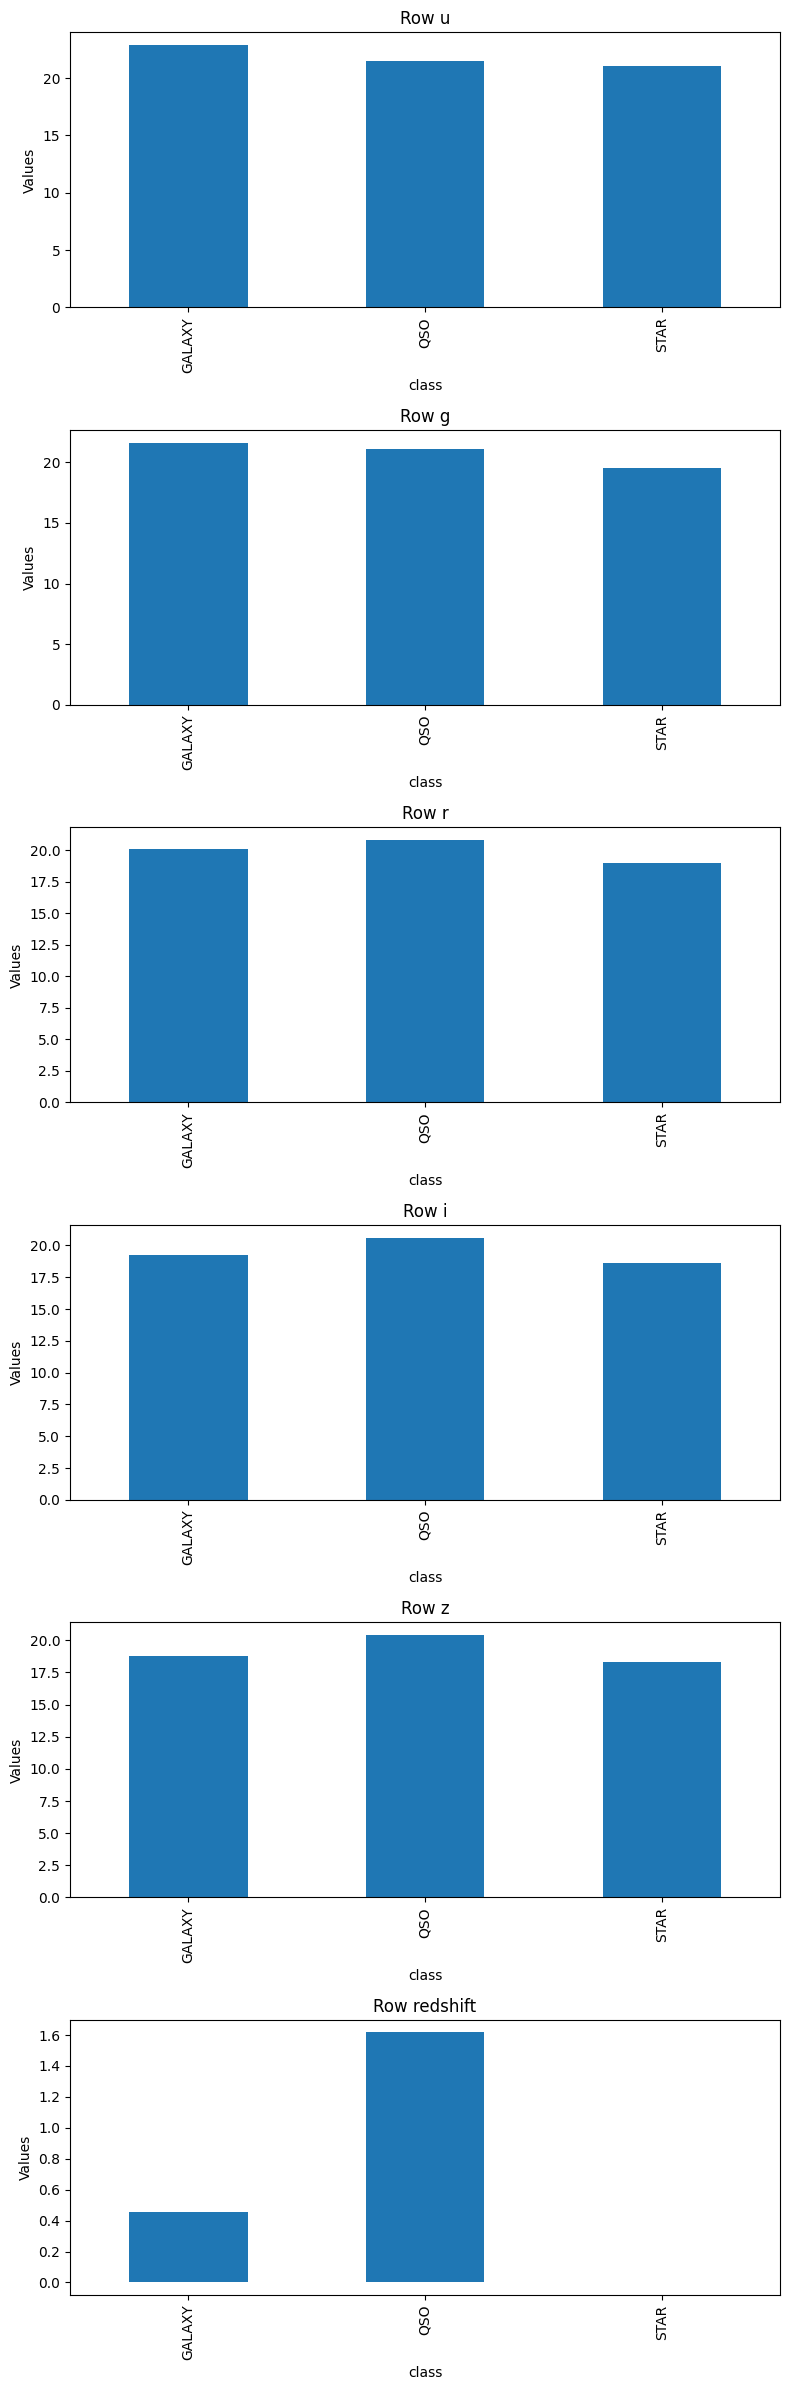

In [24]:
fig, axes = plt.subplots(nrows=len(median_df), figsize=(8, 4 * len(median_df)))

# Iterate through each row and plot a bar graph
for i, (index, row) in enumerate(median_df.iterrows()):
    # Create a bar plot for each row
    ax = axes[i]
    row.plot(kind='bar', ax=ax, title=f'Row {index}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

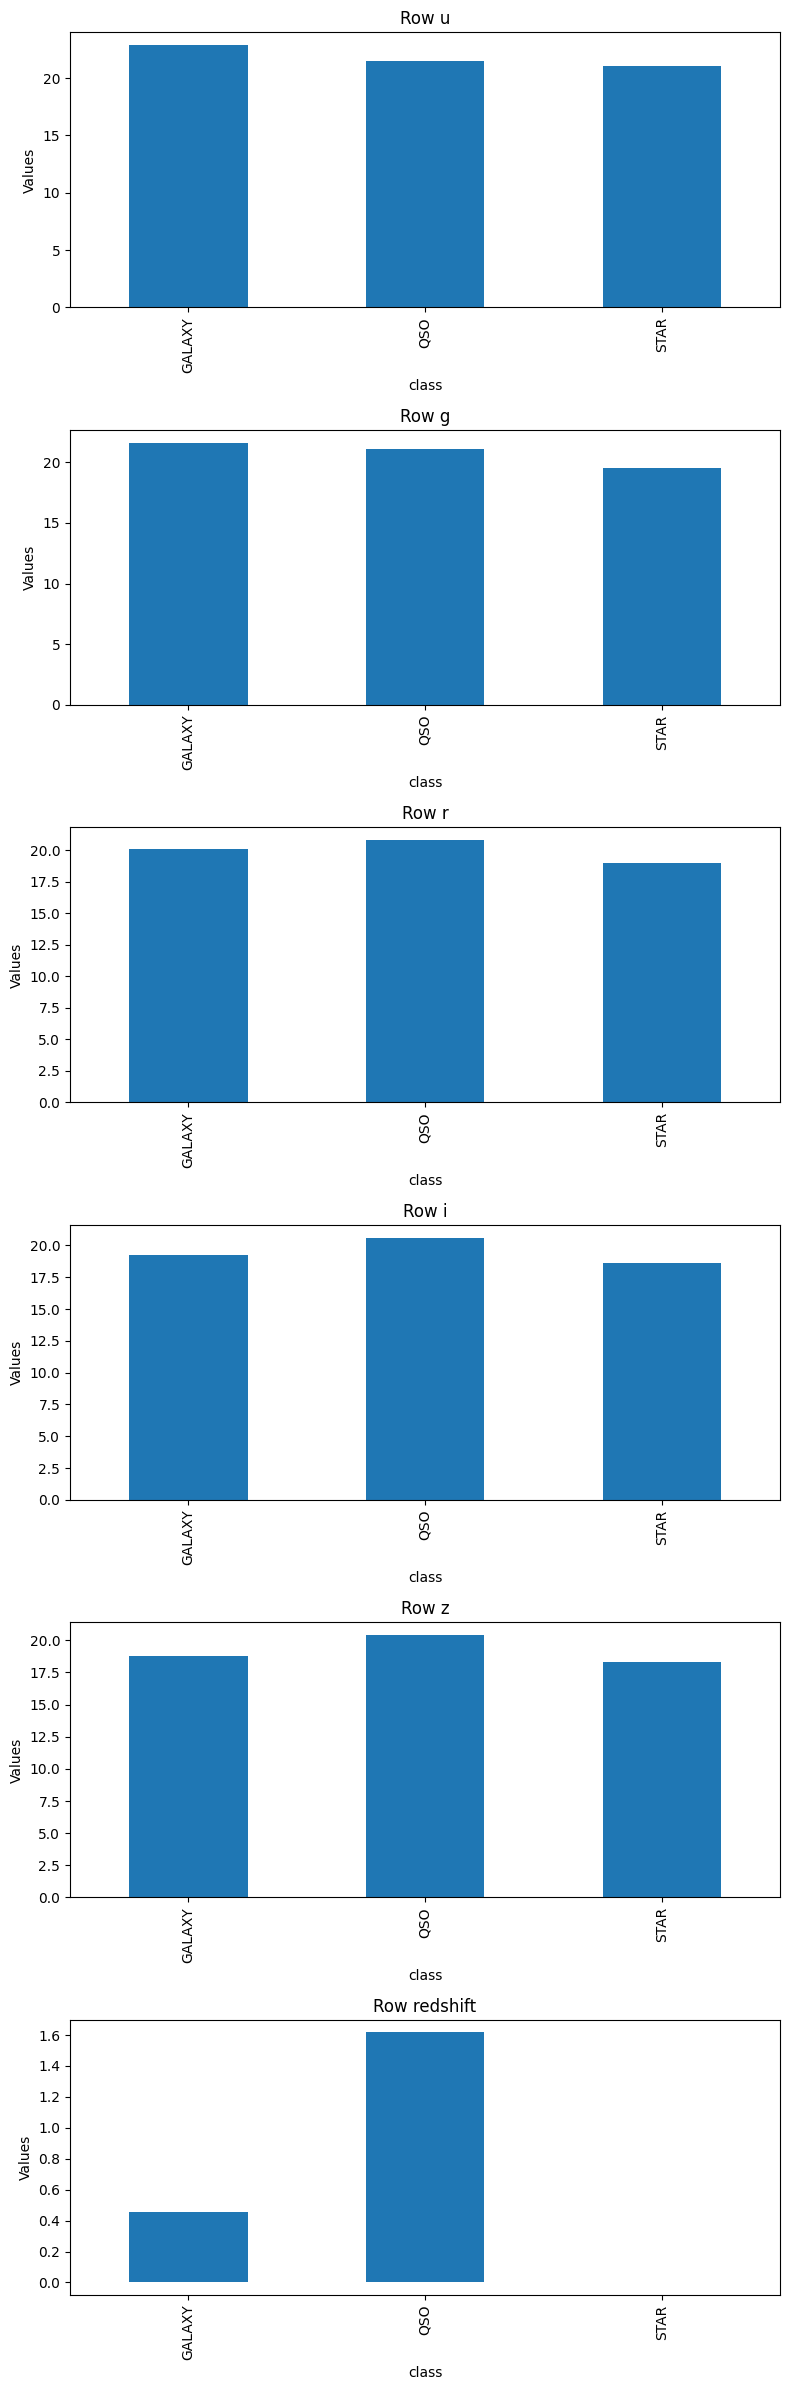

In [25]:
fig, axes = plt.subplots(nrows=len(normalized_median_df), figsize=(8, 4 * len(normalized_median_df)))

# Iterate through each row and plot a bar graph
for i, (index, row) in enumerate(normalized_median_df.iterrows()):
    # Create a bar plot for each row
    ax = axes[i]
    row.plot(kind='bar', ax=ax, title=f'Row {index}')
    ax.set_ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()